In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Preparing a mold for image input in ResNet50
input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

In [2]:
im_size = [224,224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
resnet = ResNet50(input_shape=im_size + [3],weights="imagenet",include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

We dont train existing weight, we are resuing the weights already available in the resnet layers

In [5]:
for layer in resnet.layers:
    layer.trainable = False

we need a final layer to classify each car

In [6]:
from glob import glob
folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

Flatten the output of the resnet layer

In [7]:
x =Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation = "softmax")(x)

In [9]:
model = Model(inputs = resnet.input, outputs = prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Data augmentation

In [12]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_data_gen.flow_from_directory('Datasets/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_data_gen.flow_from_directory('Datasets/test', target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


## Fitting the model

In [16]:
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 4 steps
Epoch 1/50
4/4 [==============================] - 12s 3s/step - loss: 9.6364 - accuracy: 0.5000 - val_loss: 1.8739 - val_accuracy: 0.3276
Epoch 2/50
4/4 [==============================] - 2s 552ms/step - loss: 5.8298 - accuracy: 0.6250 - val_loss: 18.7789 - val_accuracy: 0.3276
Epoch 3/50
4/4 [==============================] - 2s 551ms/step - loss: 1.6843 - accuracy: 0.8750 - val_loss: 19.4905 - val_accuracy: 0.3276
Epoch 4/50
4/4 [==============================] - 2s 547ms/step - loss: 0.2223 - accuracy: 0.9375 - val_loss: 20.8076 - val_accuracy: 0.3276
Epoch 5/50
4/4 [==============================] - 2s 566ms/step - loss: 0.1616 - accuracy: 0.9844 - val_loss: 23.2305 - val_accuracy: 0.3276
Epoch 6/50
4/4 [==============================] - 2s 545ms/step - loss: 0.0398 - accuracy: 0.9844 - val_loss: 26.1726 - val_accuracy: 0.3276
Epoch 7/50
4/4 [==============================] - 2s 565ms/step - l

## Plotting losses

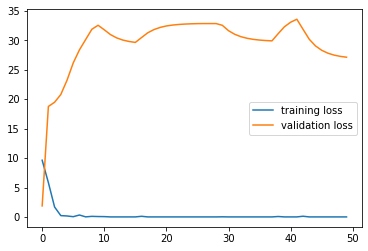

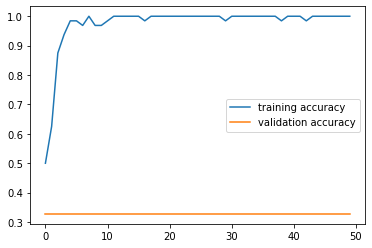

In [17]:
plt.plot(r.history['loss'],label = 'training loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()